In [2]:
import numpy as np
from sklearn.decomposition import PCA
import sklearn.cluster
import pandas as pd
import os
import imageio
import matplotlib.pyplot as plt

In [5]:
#import training data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv("test_data.csv", names=['sepal length','sepal width','petal length','petal width','target'], sep=",")
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [4]:
c = 0
l = []
for fname in os.listdir("imagesselected"):
    c = c+1
    l.append(np.array(imageio.imread("imagesselected/"+fname)).flatten())
data = np.array(l)
data = data/255

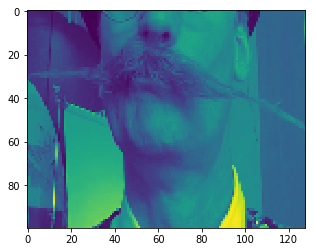

In [22]:
plt.imshow(data[3].reshape((100,128)))

In [12]:
def perform_pca_k(data, k):
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(data)
    pca_df = pd.DataFrame(data = principalComponents, 
                               columns = ["pc"+str(i) for i in range(1,k+1)])
    return pca, pca_df

def perform_pca_ratio(data, ratio):
    pca = PCA(ratio)
    principalComponents = pca.fit_transform(data)
    pca_df = pd.DataFrame(data = principalComponents, 
                               columns = ["pc"+str(i) for i in range(1,pca.n_components_+1)])
    return pca, pca_df

In [18]:
pca, pca_df=perform_pca_k(data, 4)
print("explained_variance: ", pca.explained_variance_ratio_)
#print("resulting df: ")
#print(pca_df)

explained_variance:  [0.29332083 0.14028816 0.08358401 0.05502816]


In [41]:
pca, pca_df = perform_pca_ratio(data, 0.9)
print("explained_variance: ", pca.explained_variance_ratio_)
#print("resulting df: ")
#print(pca_df)

explained_variance:  [0.29332083 0.14028816 0.08358401 0.05502816 0.05407165 0.04665446
 0.03855747 0.03046109 0.02571062 0.02427844 0.01887228 0.01674158
 0.01456111 0.01212222 0.01057037 0.00946142 0.00905781 0.00866809
 0.00768762 0.00560192]


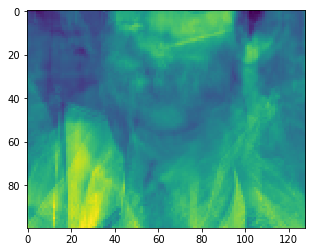

In [29]:
first_entry = np.array(pca_df.iloc[3,:])

approximation = pca.inverse_transform(first_entry)
approximation

plt.imshow(approximation.reshape((100,128)))

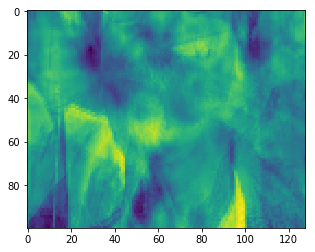

In [45]:
plt.imshow(pca.components_[8].reshape((100,128)))

In [46]:
from sklearn.cluster import MeanShift
clustering = MeanShift(bandwi).fit(data)  

In [50]:
np.argmax(clustering.labels_)

5